# Image feature extraction using RBM

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report


%matplotlib inline

### Data: [Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist/home)  
#### license: The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com
THe dataset contains images of clothes for classification. The training set contains 60000 images, and the test set contains an additional 10000 images. Each image is 28 x 28 pixles and one of the following:
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot  



* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255) 

In [2]:
# load the dataset
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Split into X & Y sets
X_train = train.drop('label', axis=1)
Y_train = train['label']
X_test = test.drop('label', axis=1)
Y_test = test['label']

In [5]:
# normalize data 
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

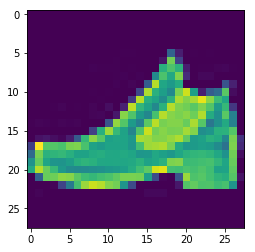

In [9]:
image = X_train[1,:].reshape((28,28))
plt.imshow(image)
plt.show()

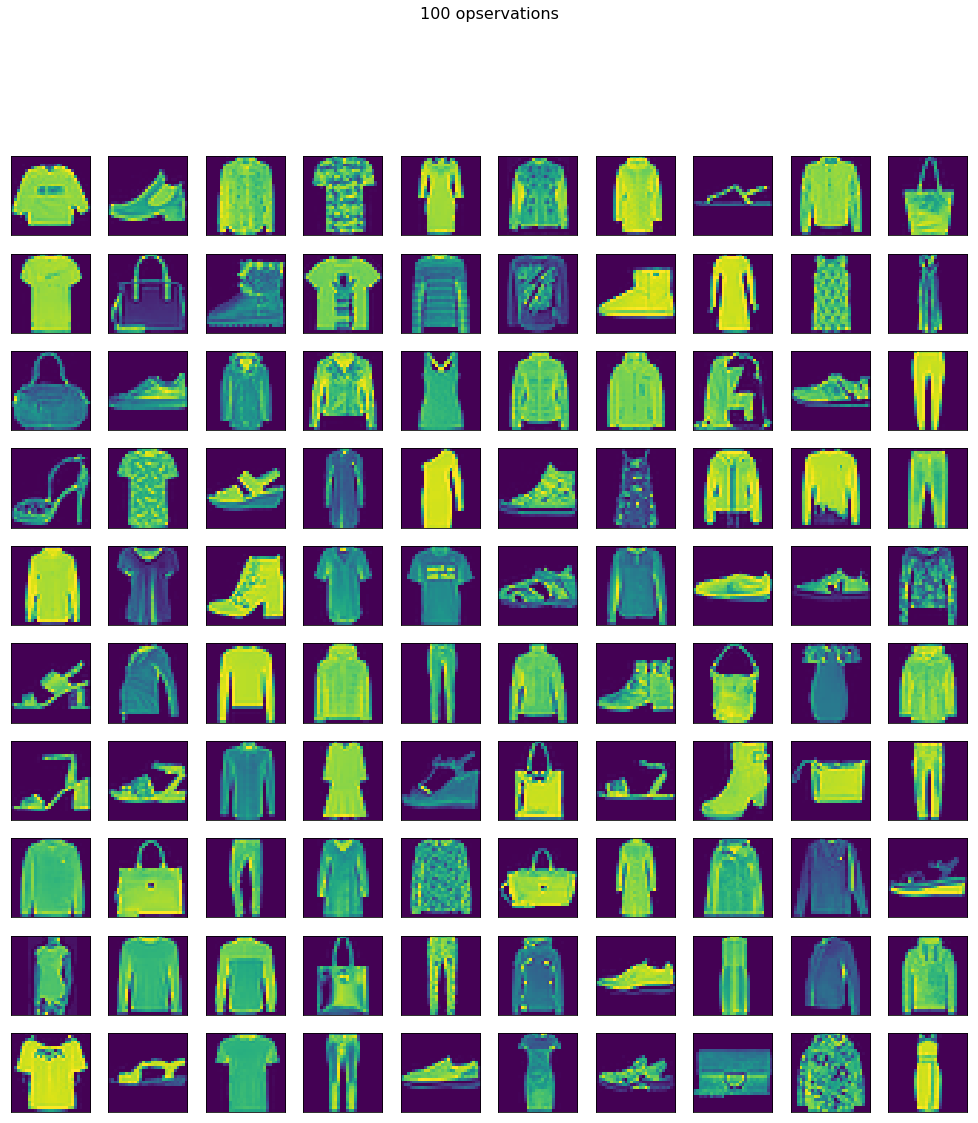

In [18]:
plt.figure(figsize=(16, 16))
for i in np.arange(100):
    plt.subplot(10, 10, i + 1)
    image = X_train[i,:].reshape((28,28))
    plt.imshow(image)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 opservations', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [ ]:
rbm = BernoulliRBM(n_components=200)
rbm.fit(X_train)

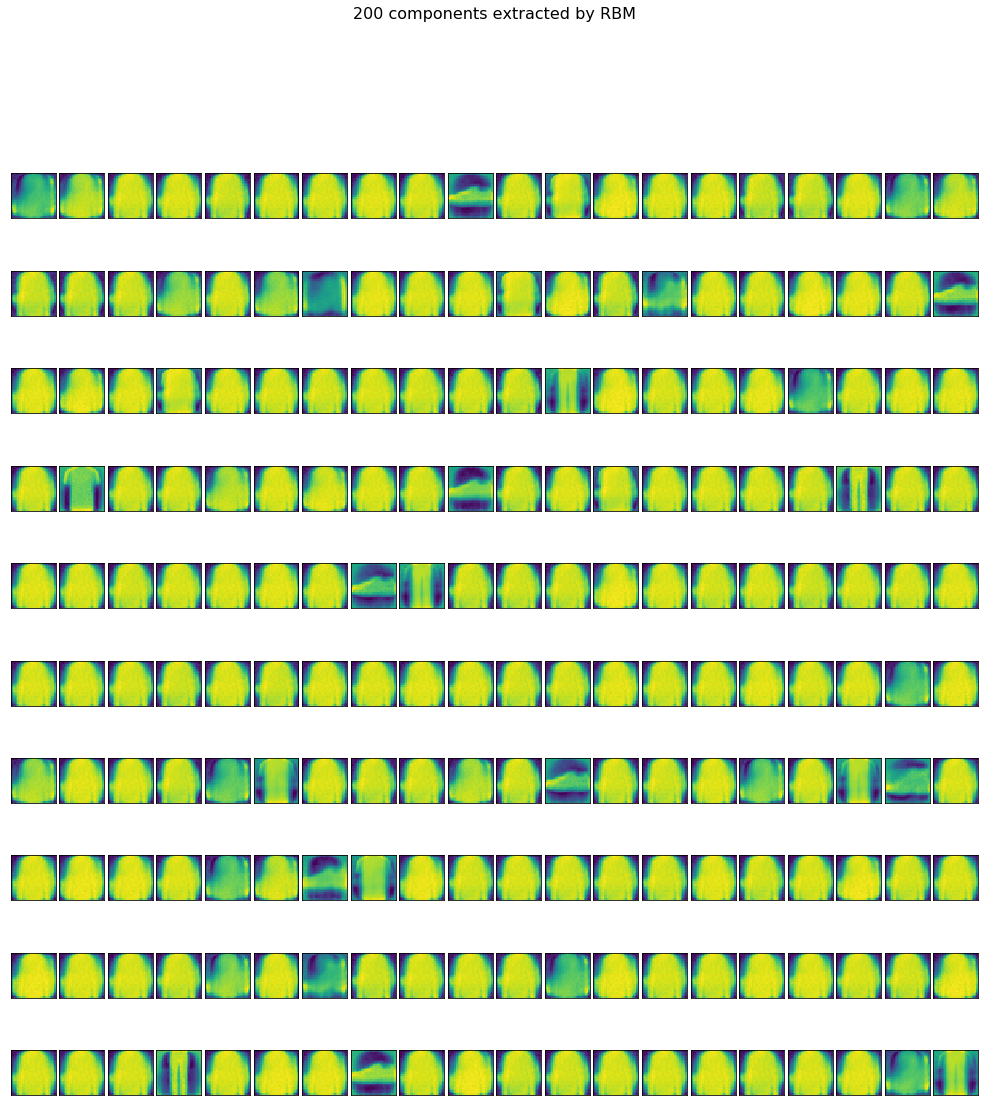

In [17]:
plt.figure(figsize=(16, 16))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 20, i + 1)
    plt.imshow(comp.reshape((28, 28)),
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('200 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [24]:
newX = rbm.transform(X_train)

In [25]:
lc = linear_model.LogisticRegression(C=100)
lc.fit(newX, Y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
newX_test = rbm.transform(X_test)

In [27]:
lc.score(newX_test, Y_test)

0.7

In [29]:
Y_pred = lc.predict(newX_test)

In [31]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.69      0.78      0.74      1000
          1       0.88      0.86      0.87      1000
          2       0.58      0.70      0.63      1000
          3       0.65      0.73      0.68      1000
          4       0.53      0.72      0.61      1000
          5       0.84      0.57      0.68      1000
          6       0.27      0.04      0.07      1000
          7       0.79      0.80      0.80      1000
          8       0.83      0.89      0.86      1000
          9       0.71      0.91      0.80      1000

avg / total       0.68      0.70      0.67     10000



# Initial Conclusion

This is a useful feature selection device as it reduced the number of features from 784 to 200. Visually, the features seem to capture the general shape of the different categories, but there are a lot that all look like the same shirt looking object.  

The results are pretty poor.